In [2]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("C:/Users/thomb/Downloads/adult.csv")
df.head(100)

age         workclass  fnlwgt     education  education.num  \
0    90                 ?   77053       HS-grad              9   
1    82           Private  132870       HS-grad              9   
2    66                 ?  186061  Some-college             10   
3    54           Private  140359       7th-8th              4   
4    41           Private  264663  Some-college             10   
..  ...               ...     ...           ...            ...   
95   46           Private  192963     Bachelors             13   
96   46  Self-emp-not-inc  198759   Prof-school             15   
97   39      Self-emp-inc  143123     Assoc-voc             11   
98   39           Private  237713   Prof-school             15   
99   59           Private   81929     Doctorate             16   

        marital.status         occupation   relationship                race  \
0              Widowed                  ?  Not-in-family               White   
1              Widowed    Exec-managerial  Not-in-family               White   
2              Widowed                  ?      Unmarried               Black   
3             Divorced  Machine-op-inspct      Unmarried               White   
4            Separated     Prof-specialty      Own-child               White   
..                 ...                ...            ...                 ...   
95  Married-civ-spouse       Adm-clerical        Husband  Asian-Pac-Islander   
96  Married-civ-spouse     Prof-specialty        Husband               White   
97  Married-civ-spouse       Craft-repair        Husband               White   
98  Married-civ-spouse              Sales        Husband               White   
99  Married-civ-spouse     Prof-specialty        Husband               White   

       sex  capital.gain  capital.loss  hours.per.week native.country income  
0   Female             0          4356              40  United-States  <=50K  
1   Female             0          4356              18  United-States  <=50K  
2   Female             0          4356              40  United-States  <=50K  
3   Female             0          3900              40  United-States  <=50K  
4   Female             0          3900              40  United-States  <=50K  
..     ...           ...           ...             ...            ...    ...  
95    Male             0          2415              35    Philippines   >50K  
96    Male             0          2415              80  United-States   >50K  
97    Male             0          2415              40  United-States   >50K  
98    Male             0          2415              99  United-States   >50K  
99    Male             0          2415              45  United-States   >50K  

[100 rows x 15 columns]

In [12]:
df.tail()

age workclass  fnlwgt     education  education.num      marital.status  \
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

<Axes: >

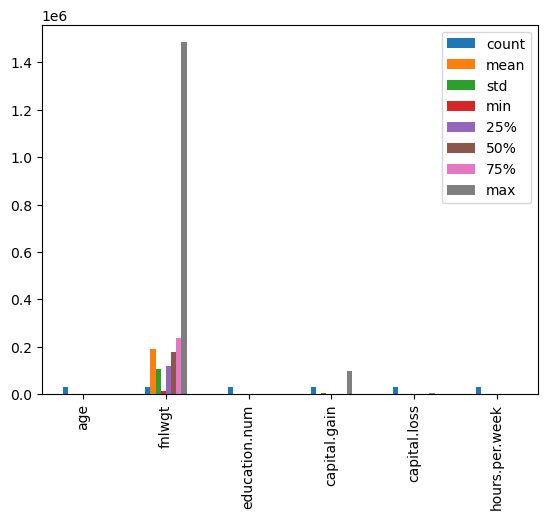

In [17]:
df.describe().T.plot(kind='bar')

In [21]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<Axes: >

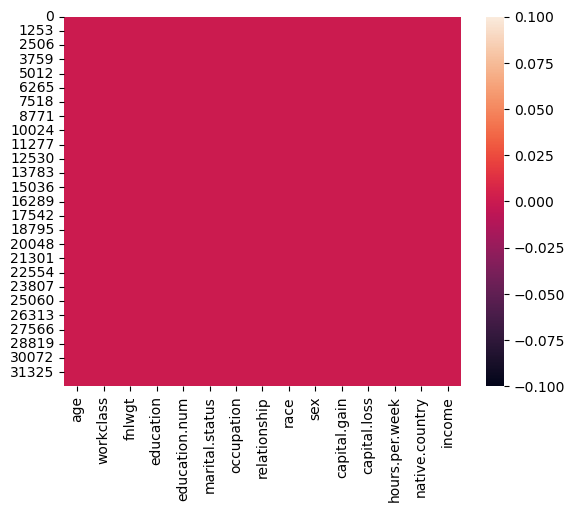

In [22]:
sns.heatmap(df.isnull())

In [24]:
df.duplicated().sum()

24

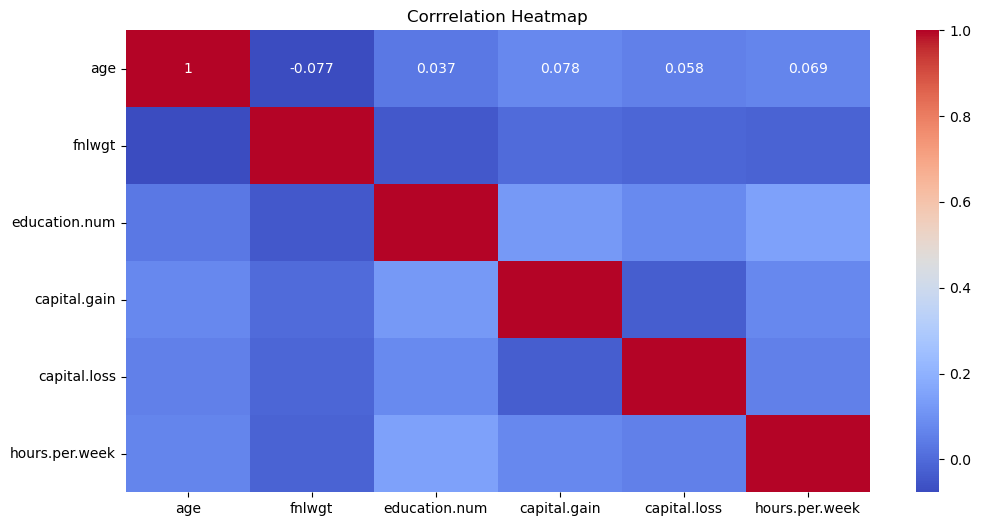

In [25]:
numeric_df=df.select_dtypes(include=['number'])
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title("Corrrelation Heatmap")
plt.show()

In [29]:
df.columns.to_list()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

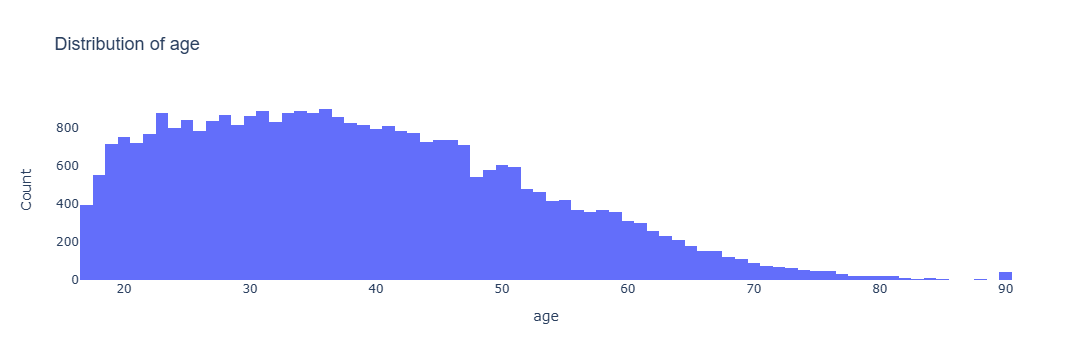

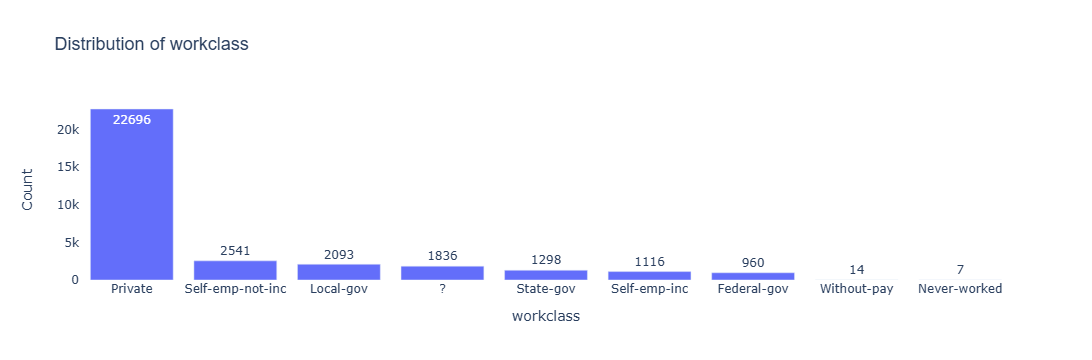

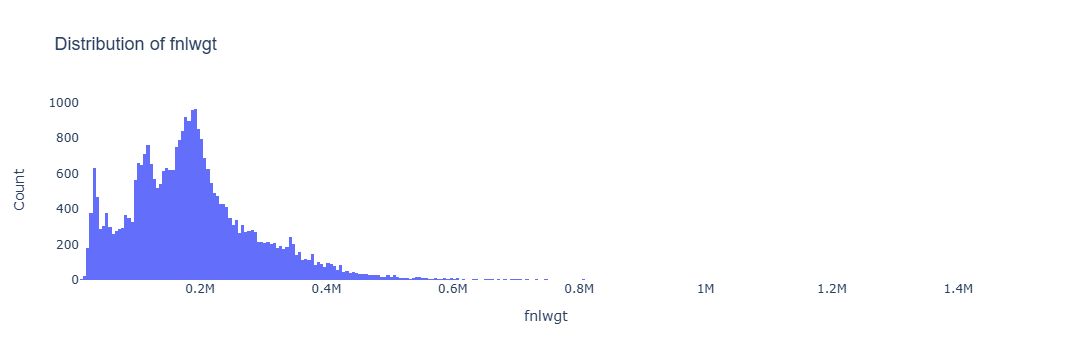

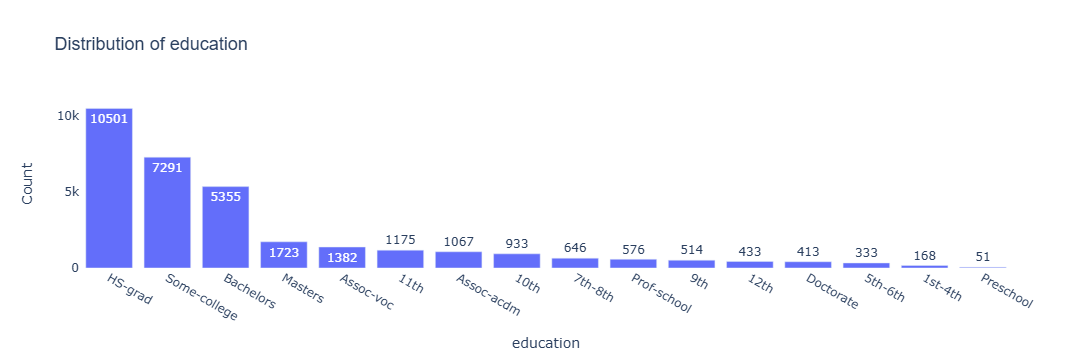

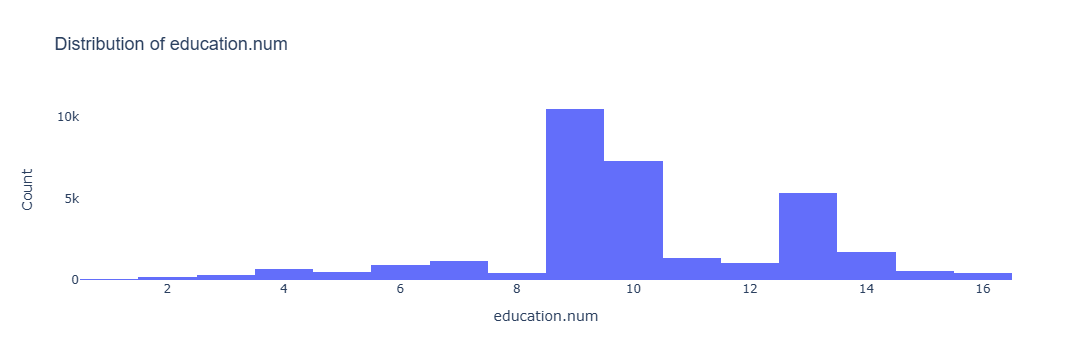

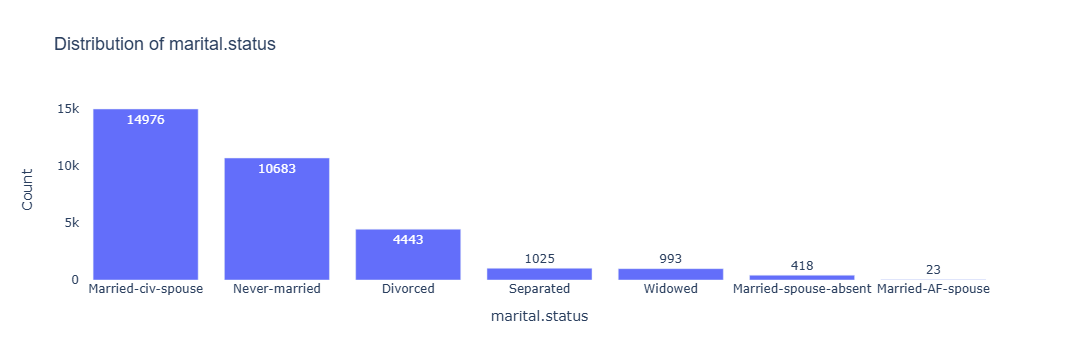

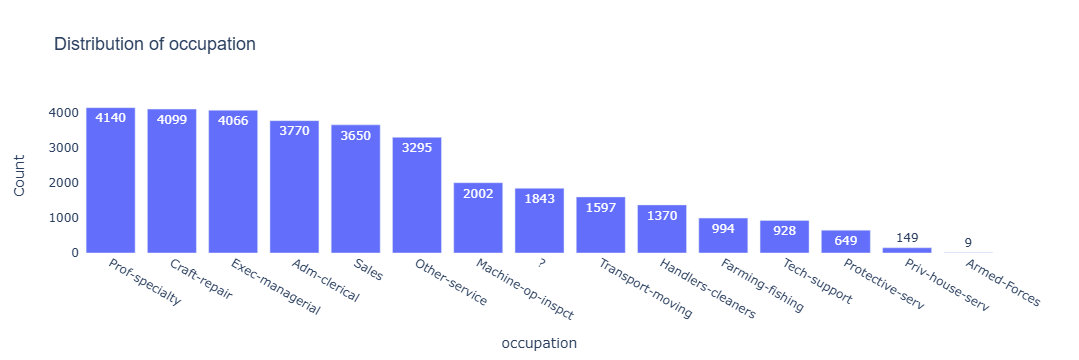

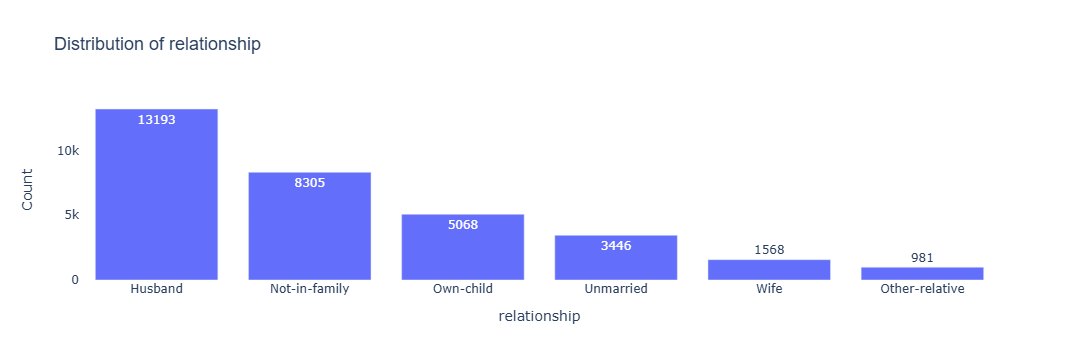

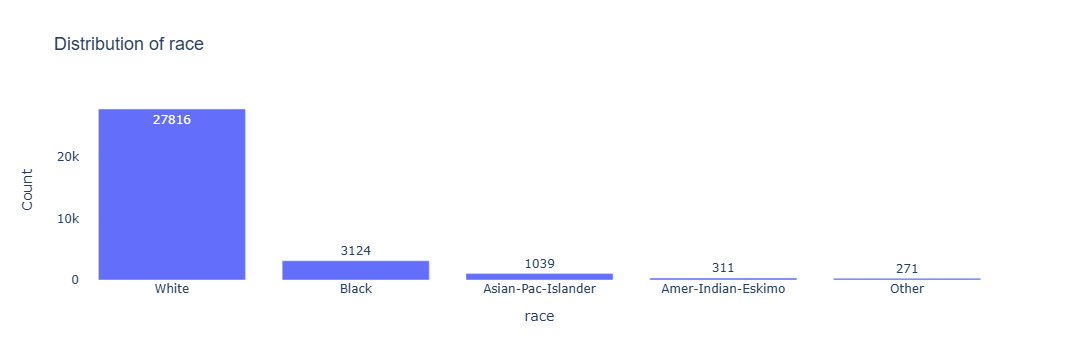

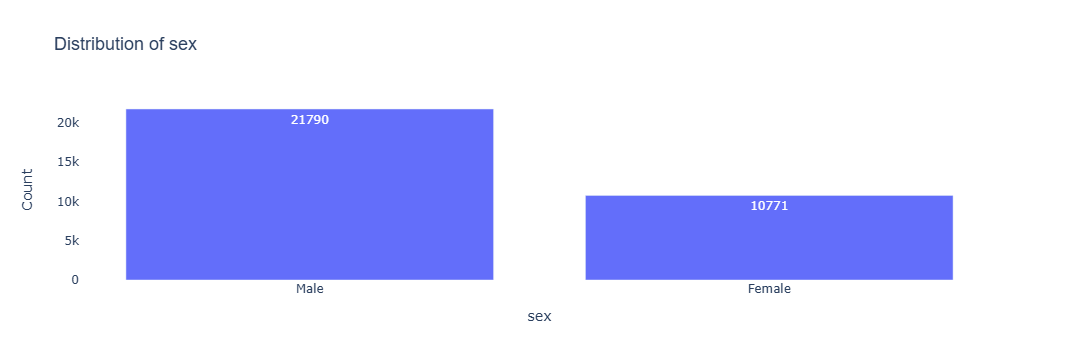

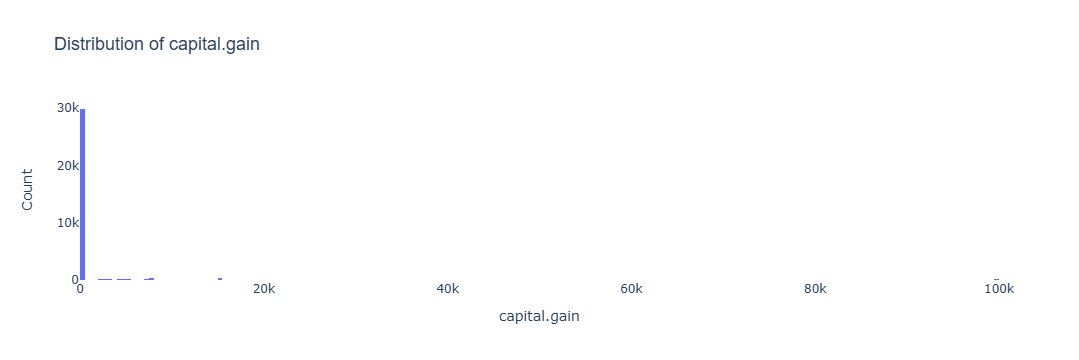

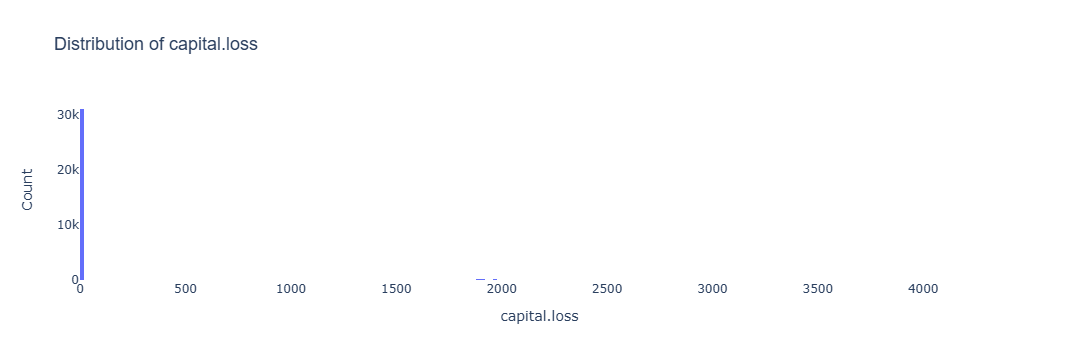

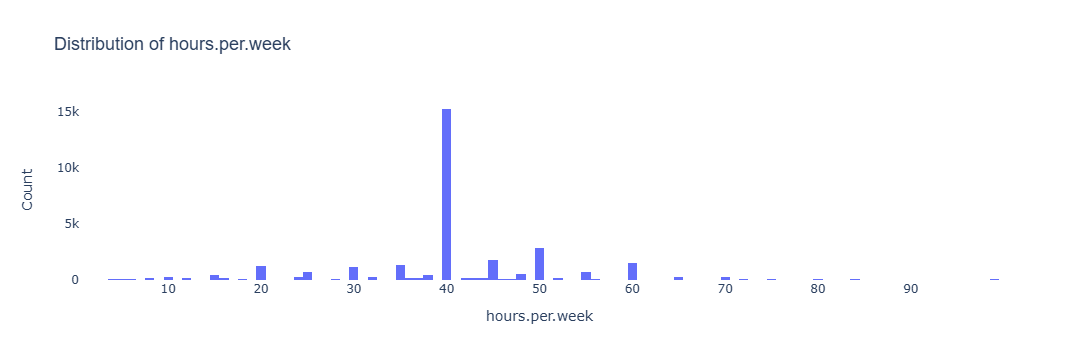

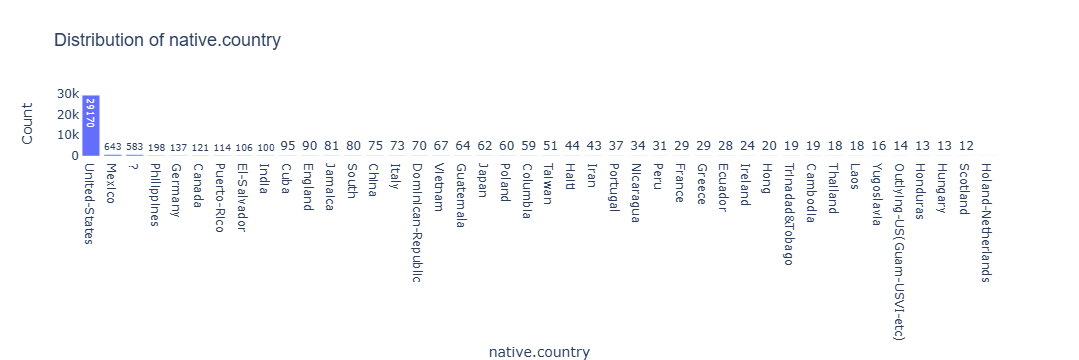

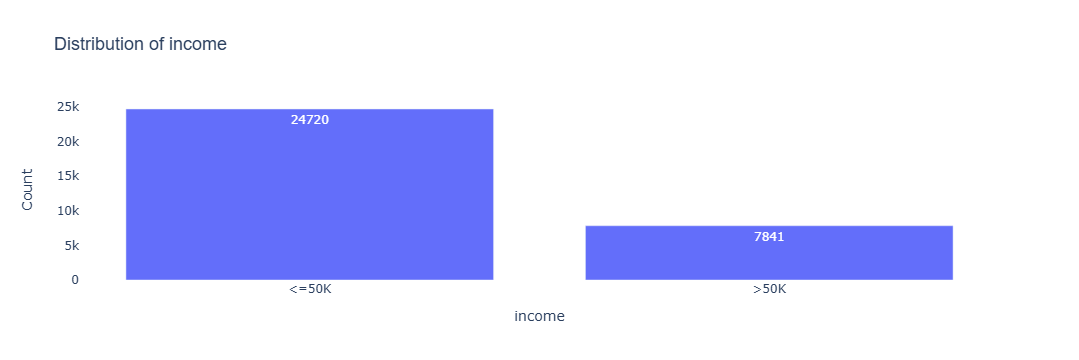

In [33]:
import plotly.express as px
columns = ['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']
for column in columns:
    if df[column].dtype == 'object' or df[column].dtype == 'category':
        column_counts = df[column].value_counts().reset_index()
        column_counts.columns = [column, 'count']
        fig = px.bar(
            column_counts,
            x=column,
            y='count',
            title=f'Distribution of {column}',
            labels={column: column, 'count': 'Count'},
            text='count'
        )
        fig.update_layout(
            xaxis_title=column,
            yaxis_title='Count',
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
            title_font=dict(size=18, family="Arial"),
            xaxis={'categoryorder':'total descending'}
        )
        fig.show()
    elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
        fig = px.histogram(
            df,
            x=column,
            title=f'Distribution of {column}',
            labels={column: column, 'count': 'Count'},
        )
        fig.update_layout(
            xaxis_title=column,
            yaxis_title='Count',
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
            title_font=dict(size=18, family="Arial")
        )
        fig.show()

In [34]:
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

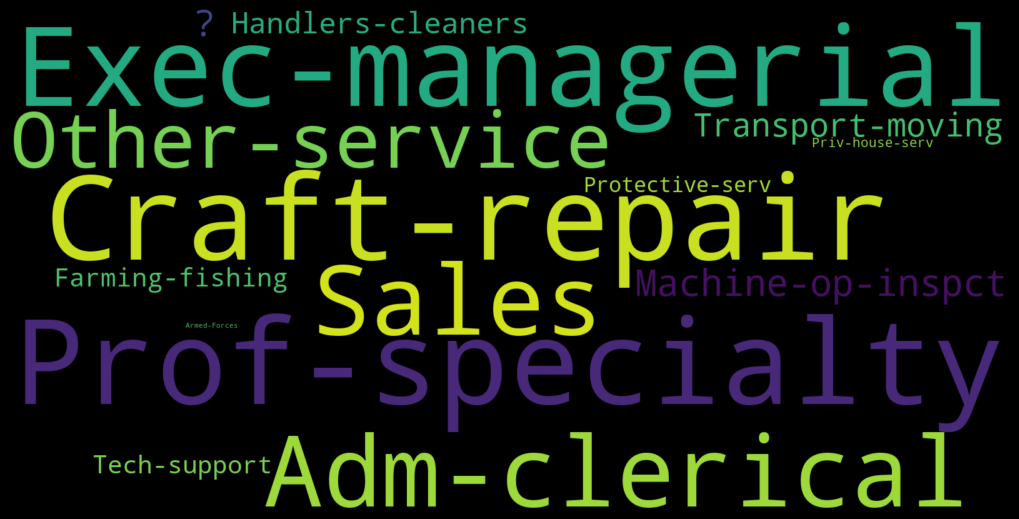

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
stop_words_list=set(STOPWORDS)
counts=Counter(df["occupation"].dropna().apply(lambda x:str(x)))
wcc=WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)
plt.figure(figsize=(10,5),facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()